In [1]:
#import libraries
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import numpy

Using TensorFlow backend.


In [2]:
import glob
from keras.layers import Dropout

In [3]:
df=read_csv('behavior.csv')
df=DataFrame(df)
df

,Unnamed: 0,Av,Rt,Th,Cost
0,2014-11-12,0.842818,0.298058,0.696617,0.664014
1,2014-11-13,0.847472,0.313881,0.634435,0.752660
2,2014-11-14,0.827666,0.292540,0.639504,0.536273
3,2014-11-15,0.865894,0.197158,0.661322,0.785753
4,2014-11-16,0.877971,0.159817,0.660387,0.675462
5,2014-11-17,0.868212,0.311304,0.641472,0.570454
6,2014-11-18,0.901666,0.224361,0.626482,0.710291
7,2014-11-19,0.863542,0.262821,0.620612,0.641154
8,2014-11-20,0.780446,0.284540,0.604847,0.694305
9,2014-11-21,0.844473,0.216095,0.674270,0.706597


In [4]:
df.drop(df.columns[[0,4]],axis=1,inplace=True)
df

,Av,Rt,Th
0,0.842818,0.298058,0.696617
1,0.847472,0.313881,0.634435
2,0.827666,0.292540,0.639504
3,0.865894,0.197158,0.661322
4,0.877971,0.159817,0.660387
5,0.868212,0.311304,0.641472
6,0.901666,0.224361,0.626482
7,0.863542,0.262821,0.620612
8,0.780446,0.284540,0.604847
9,0.844473,0.216095,0.674270


In [5]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_in number of lag observations
    #n_out number of next observations
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import LabelEncoder
from numpy import concatenate
#from pandas import DataFrame
#from pandas import concat
#encoder =LabelEncoder()
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df.values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#reframed = series_to_supervised(scaled, 8, 4)
# frame as supervised learning
reframed = series_to_supervised(scaled, 12, 4)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)
print(reframed.shape)
print(reframed.head())
# drop columns we don't want to predict

(1425, 48)
    var1(t-12)  var2(t-12)  var3(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  \
12    0.842818    0.298058    0.696617    0.847472    0.313881    0.634435   
13    0.847472    0.313881    0.634435    0.827666    0.292540    0.639504   
14    0.827666    0.292540    0.639504    0.865894    0.197158    0.661322   
15    0.865894    0.197158    0.661322    0.877971    0.159817    0.660387   
16    0.877971    0.159817    0.660387    0.868212    0.311304    0.641472   

    var1(t-10)  var2(t-10)  var3(t-10)  var1(t-9)    ...       var3(t)  \
12    0.827666    0.292540    0.639504   0.865894    ...      0.656693   
13    0.865894    0.197158    0.661322   0.877971    ...      0.647996   
14    0.877971    0.159817    0.660387   0.868212    ...      0.678312   
15    0.868212    0.311304    0.641472   0.901666    ...      0.688392   
16    0.901666    0.224361    0.626482   0.863542    ...      0.657991   

    var1(t+1)  var2(t+1)  var3(t+1)  var1(t+2)  var2(t+2)  var3(t+2)  \
12 

In [7]:
flatten_data=numpy.array(reframed)

In [8]:
print(flatten_data.shape)

(1425, 48)


In [9]:
# split into train and test sets 80%
train = flatten_data[:1140,:]
test = flatten_data[1140:,:]
# split into input and outputs
train_X, train_y = train[:, :36], train[:,36:]
test_X, test_y = test[:, :36], test[:,36:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 12, 3))
test_X = test_X.reshape((test_X.shape[0], 12, 3))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1140, 12, 3) (1140, 12) (285, 12, 3) (285, 12)


In [10]:
from keras import regularizers

In [30]:
# design network
model = Sequential()
model.add(LSTM(16, input_shape=(train_X.shape[1], train_X.shape[2]))) #,return_sequences=True
#model.add(Dropout(0.1))
#model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(12))#,activation="relu",activity_regularizer=regularizers.l1(0.01)
model.compile(loss='mse', optimizer='adam')  #'mae mse
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                204       
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=2, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Train on 1140 samples, validate on 285 samples
Epoch 1/50
 - 12s - loss: 0.0658 - val_loss: 0.0070
Epoch 2/50
 - 11s - loss: 0.0185 - val_loss: 0.0044
Epoch 3/50
 - 16s - loss: 0.0127 - val_loss: 0.0036
Epoch 4/50
 - 12s - loss: 0.0102 - val_loss: 0.0035
Epoch 5/50
 - 10s - loss: 0.0088 - val_loss: 0.0034
Epoch 6/50
 - 10s - loss: 0.0078 - val_loss: 0.0032
Epoch 7/50
 - 13s - loss: 0.0070 - val_loss: 0.0031
Epoch 8/50
 - 10s - loss: 0.0065 - val_loss: 0.0030
Epoch 9/50
 - 9s - loss: 0.0060 - val_loss: 0.0031
Epoch 10/50
 - 10s - loss: 0.0057 - val_loss: 0.0031
Epoch 11/50
 - 11s - loss: 0.0057 - val_loss: 0.0030
Epoch 12/50
 - 10s - loss: 0.0055 - val_loss: 0.0029
Epoch 13/50
 - 10s - loss: 0.0052 - val_loss: 0.0031
Epoch 14/50
 - 10s - loss: 0.0052 - val_loss: 0.0031
Epoch 15/50
 - 10s - loss: 0.0050 - val_loss: 0.0029
Epoch 16/50
 - 10s - loss: 0.0052 - val_loss: 0.0030
Epoch 17/50
 - 10s - loss: 0.0051 - val_loss: 0.0033
Epoch 18/50
 - 10s - loss: 0.0051 - val_loss: 0.0029
Epoch 19/

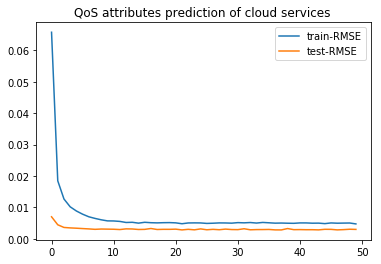

In [32]:
# plot history
pyplot.plot(history.history['loss'], label='train-RMSE')
pyplot.plot(history.history['val_loss'], label='test-RMSE')
pyplot.title("QoS attributes prediction of cloud services ")
pyplot.legend()
pyplot.show()

In [33]:

from math import sqrt
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))


In [34]:
# invert scaling for forecast
#20/5=4

inv_yhat1 = scaler.inverse_transform(yhat[:,0:3])
inv_yhat2 = scaler.inverse_transform(yhat[:,3:6])
inv_yhat3 = scaler.inverse_transform(yhat[:,6:9])
inv_yhat4 = scaler.inverse_transform(yhat[:,9:12])
inv_yhat = concatenate((inv_yhat1,inv_yhat2 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat3 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat4 ), axis=1)
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y1 = scaler.inverse_transform(test_y[:,0:3])
inv_y2 = scaler.inverse_transform(test_y[:,3:6])
inv_y3 = scaler.inverse_transform(test_y[:,6:9])
inv_y4 = scaler.inverse_transform(test_y[:,9:12])
inv_y = concatenate((inv_y1,inv_y2 ), axis=1)
inv_y = concatenate((inv_y,inv_y3 ), axis=1)
inv_y = concatenate((inv_y,inv_y4 ), axis=1)

In [35]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.055


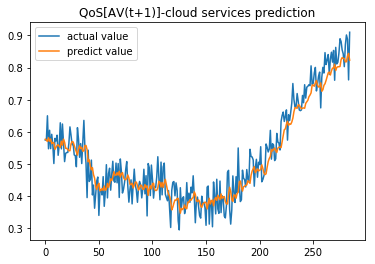

In [17]:
# plot history
pyplot.plot(inv_y[:,0], label='actual value')
pyplot.plot(inv_yhat[:,0], label='predict value')
pyplot.title("QoS[AV(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

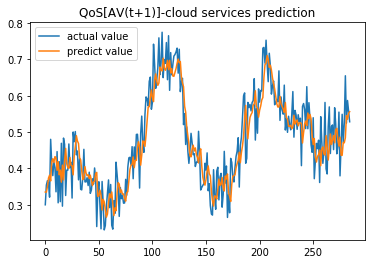

In [18]:
# plot history
pyplot.plot(inv_y[:,1], label='actual value')
pyplot.plot(inv_yhat[:,1], label='predict value')
pyplot.title("QoS[AV(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

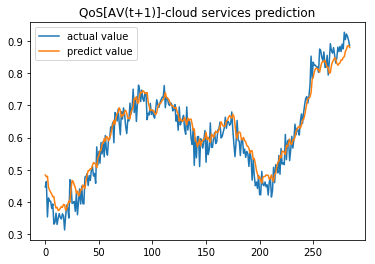

In [19]:
# plot history
pyplot.plot(inv_y[:,2], label='actual value')
pyplot.plot(inv_yhat[:,2], label='predict value')
pyplot.title("QoS[AV(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

In [20]:
results=[]
for i in range(12):
    results.append(sqrt(mean_squared_error(inv_y[:,i], inv_yhat[:,i])))

         Av        Rt        Th
0  0.049598  0.062902  0.038815
1  0.052779  0.065957  0.039981
2  0.052610  0.068647  0.042234
3  0.056073  0.072467  0.045936


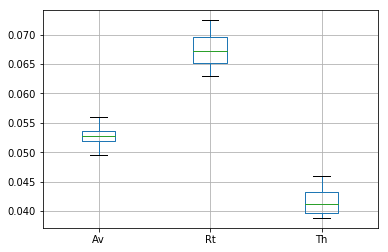

In [21]:
QoS_names=['Av','Rt','Th']
QoS=[]
QoS_total=[]
for i in range(4):
    QoS=results[i*3:i*3+3]
    QoS_total.append(QoS)
QoS_total=DataFrame(QoS_total)
QoS_total.columns=QoS_names
print(QoS_total)
QoS_total.boxplot()

In [22]:
#predict the future 4 values  for each time series
supervised_data = series_to_supervised(scaled[1427:1440],12, 0)   
supervised_data=numpy.array(supervised_data)

In [23]:
#export predicted values for each provider
temp=supervised_data.reshape((supervised_data.shape[0], 12, 3))
predict_QoS_Weights=model.predict(temp)
predict_QoS_Weights=numpy.array(predict_QoS_Weights)
predict_QoS_Weights=predict_QoS_Weights.reshape(4,3)
predict_QoS_Weights=DataFrame(predict_QoS_Weights)

In [24]:
predict_QoS_Weights.to_csv('future user_behavior.csv')

In [25]:
model.save('user_preference_Model.h5')

In [26]:
from keras.models import load_model

In [27]:
model1=load_model('user_preference_Model.h5')

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________
